## Data integration

Combining data from different sources to provide a unified view or dataset.


## Human population
UN WPP-Adjusted Population Density, v4.11 (2000, 2005, 2010, 2015, 2020)
The dataset you've mentioned is called **"UN WPP-Adjusted Population Density, v4.11"**. Let me provide you with a detailed description:

- **Purpose**: The primary purpose of this dataset is to offer estimates of **population density** for specific years (2000, 2005, 2010, 2015, and 2020). These estimates are based on counts consistent with national censuses and population registers, considering relative spatial distribution. However, these counts have been adjusted to match the **United Nations World Population Prospects (UN WPP)** country totals.

- **Abstract**: The dataset, known as **Gridded Population of the World, Version 4 (GPWv4)**, provides information on human population density. It represents the number of persons per square kilometer. The data is derived from approximately **13.5 million national and sub-national administrative units**. A proportional allocation gridding algorithm was used to assign UN WPP-adjusted population counts to **30 arc-second grid cells**. These density rasters were created by dividing the UN WPP-adjusted population count raster for a given target year by the land area raster. The data files are available globally at a resolution of **30 arc-seconds** (approximately 1 km at the equator). Additionally, the adjusted count data has been aggregated to other resolutions such as **2.5 arc-minutes, 15 arc-minutes, 30 arc-minutes, and 1 degree** to facilitate faster global processing and support research communities.

- **Recommended Citation**: If you use this dataset, please cite it as follows:
  - *Center for International Earth Science Information Network - CIESIN - Columbia University. 2018. Gridded Population of the World, Version 4 (GPWv4): Population Density Adjusted to Match 2015 Revision UN WPP Country Totals, Revision 11. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC).* ¹

You can access the dataset and additional documentation through the [SEDAC website](https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11) ¹. It provides globally consistent and spatially explicit data that can be used for research, policy-making, and communications across various disciplines. 🌍📊

Source: Conversation with Bing, 3/23/2024
(1) UN WPP-Adjusted Population Density, v4.11: Gridded Population of the .... https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11.
(2) Downloads » UN-Adjusted Population Density, v4: Gridded Population of .... https://beta.sedac.ciesin.columbia.edu/data/set/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals/data-download.
(3) Gridded Population of the World, Version 4 (GPWv4 ... - Catalog. https://catalog.data.gov/dataset/gridded-population-of-the-world-version-4-gpwv4-population-count-adjusted-to-match-2015-re-42463.
(4) GPWv411: UN-Adjusted Population Density (Gridded Population of the .... https://developers.google.com/earth-engine/datasets/catalog/CIESIN_GPWv411_GPW_UNWPP-Adjusted_Population_Density.
(5) Gridded Population of the World (GPW), v4 | SEDAC. https://sedac.ciesin.columbia.edu/data/collection/gpw-v4.
(6) undefined. https://doi.org/10.7927/H4F47M65.

In [1]:
import pandas as pd
population_density_df=pd.read_parquet('Data/FinalDataSet/population_density_morocco_2020_corrected.parquet').drop(columns=['geometry'])

In [2]:
population_density_df

,Latitude,Longitude,PopulationDensity
120944198,35.920833,-5.404167,252.198090
120944199,35.920833,-5.395833,252.198090
120944200,35.920833,-5.379167,4006.628174
120944201,35.920833,-5.370833,4006.628174
120944202,35.920833,-5.362500,4006.628174
...,...,...,...
151626060,21.154167,-17.020833,0.027001
151626061,21.154167,-17.012500,0.088375
151626062,21.154167,-17.004167,0.148910
151640625,21.145833,-17.004167,0.000962


In [2]:
from haversine import haversine, Unit
import pandas as pd

def population_matching(df, population_df):
    """
    Add PopulationDensity column to df by finding the nearest point in population_df
    based on Longitude and Latitude.

    Parameters:
    - df: DataFrame with columns ['Longitude', 'Latitude']
    - population_df: DataFrame with columns ['Longitude', 'Latitude', 'PopulationDensity']

    Returns:
    - DataFrame: Original df with an added 'PopulationDensity' column.
    """
    # Prepare an empty list to store population density values
    population_density_matches = []

    # Iterate through each row in df
    for _, row in df.iterrows():
        current_point = (row['Latitude'], row['Longitude'])

        # Calculate the distance from the current point to all points in population_df
        population_df['Distance'] = population_df.apply(
            lambda x: haversine(current_point, (x['Latitude'], x['Longitude']), unit=Unit.KILOMETERS),
            axis=1
        )

        # Find the closest population density point
        nearest_population_density = population_df.loc[population_df['Distance'].idxmin(), 'PopulationDensity']

        # Append the nearest population density value to the list
        population_density_matches.append(nearest_population_density)

    # Add the population density matches to the original DataFrame
    df['PopulationDensity'] = population_density_matches

    # Return the modified DataFrame
    return df

# Example usage:
# Assuming you have a DataFrame df and a population DataFrame population_df defined elsewhere
# df = pd.DataFrame({'Longitude': [...], 'Latitude': [...]})
# population_df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'PopulationDensity': [...]})

# result_df = population_matching(df, population_df)
# print(result_df)


## NDVI index form 2010 to 2024

Certainly! Let's delve into the details of the **ndvi3g_geo_v1_2_2018_0712.nc4** dataset from NASA Earth:

1. **Dataset Overview**:
   - The dataset holds information related to the **Normalized Difference Vegetation Index (NDVI)**.
   - NDVI is a crucial metric for assessing vegetation health and productivity.
   - It is based on corrected and calibrated measurements from the **Advanced Very High Resolution Radiometer (AVHRR)** data.
   - The spatial resolution of this dataset is **0.0833 degree**, covering the globe.
   - The data spans from **1982 to 2022**.
   - Maximum NDVI values are reported within **twice monthly compositing periods** (two values per month).
   - The dataset accounts for various deleterious effects, including calibration loss, orbital drift, and volcanic eruptions.
   - It provides one of the **longest continuous records** of global vegetation productivity.
   - The data are provided in **NetCDF format**.
   - This dataset has been widely used by the remote sensing community and has supported numerous scientific publications.

2. **File Naming Convention**:
   - The files follow the naming convention: **ndvi3g_geo_[version]_[year]_[month1][month2].nc4**.
     - **Version**: Alphanumeric version designation (e.g., "v1").
     - **Year**: 4-digit year.
     - **Month1**: 2-digit month at the beginning of the composite period (e.g., "01" for January or "07" for July).

3. **Example**:
   - An example file name would be **ndvi3g_geo_v1_2_2018_0712.nc4**.

![Global NDVI pattern for late July 2021](https://daac.ornl.gov/VEGETATION/guides/images/ndvi3g_geo_v1_2_2021_0712.png)

4. **Citation**:
   - Pinzon, J.E., E.W. Pak, C.J. Tucker, U.S. Bhatt, G.V. Frost, and M.J. Macander. 2023. **Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022**. ORNL DAAC, Oak Ridge, Tennessee, USA. ¹

For more details and to access the dataset, you can visit the [ORNL DAAC page](https://doi.org/10.3334/ORNLDAAC/2187) ¹.

Source: Conversation with Bing, 3/23/2024
(1) Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022. https://daac.ornl.gov/VEGETATION/guides/Global_Veg_Greenness_GIMMS_3G.html.
(2) Global Vegetation Greenness (NDVI) from AVHRR GIMMS-3G+, 1981-2022 .... https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=2187.
(3) dataset: NASA ARC ECOCAST GIMMS NDVI3g v1p0 - Columbia University. https://iridl.ldeo.columbia.edu/SOURCES/.NASA/.ARC/.ECOCAST/.GIMMS/.NDVI3g/.v1p0/.
(4) Global GIMMS NDVI3g v1 dataset (1981-2015)- A Big Earth Data Platform .... http://poles.tpdc.ac.cn/en/data/9775f2b4-7370-4e5e-a537-3482c9a83d88/.
(5) undefined. https://doi.org/10.3334/ORNLDAAC/2187.

In [5]:
ndvi_df=pd.read_parquet('Data/FinalDataSet/morocco_ndvi_data.parquet').drop(columns=['geometry'])

In [6]:
ndvi_df

,Latitude,Longitude,Date,NDVI,Satellites,Percentile
0,35.875000,-5.458333,2010-01-08,4713,18,768
1,35.875000,-5.375000,2010-01-08,5958,18,265
2,35.791667,-5.875000,2010-01-08,5091,18,820
3,35.791667,-5.791667,2010-01-08,3169,18,815
4,35.791667,-5.708333,2010-01-08,4895,18,793
...,...,...,...,...,...,...
2850115,21.375000,-13.208333,2022-12-24,1069,20,739
2850116,21.375000,-13.125000,2022-12-24,1089,20,797
2850117,21.375000,-13.041667,2022-12-24,1120,20,834
2850118,21.208333,-17.041667,2022-12-24,876,20,419


In [3]:
from haversine import haversine, Unit
import pandas as pd
from pandas.tseries.offsets import DateOffset

def ndvi_matching(df, ndvi_df):
    """
    Add NDVI column to df by finding the nearest point in ndvi_df
    based on Longitude, Latitude, and the closest date within 2 months before the position.

    Parameters:
    - df: DataFrame with columns ['Longitude', 'Latitude', 'Date']
    - ndvi_df: DataFrame with columns ['Longitude', 'Latitude', 'Date', 'NDVI']

    Returns:
    - DataFrame: Original df with an added 'NDVI' column.
    """
    # Prepare an empty list to store NDVI values
    ndvi_matches = []

    # Ensure the 'Date' columns are in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'])

    # Iterate through each row in df
    for _, row in df.iterrows():
        current_point = (row['Latitude'], row['Longitude'])
        current_date = row['Date']
        two_months_prior = current_date - DateOffset(months=2)

        # Filter ndvi_df for dates within the 2 months window before the current date
        filtered_ndvi_df = ndvi_df[(ndvi_df['Date'] > two_months_prior) & (ndvi_df['Date'] <= current_date)]

        if not filtered_ndvi_df.empty:
            # Calculate the distance from the current point to all points in filtered_ndvi_df
            filtered_ndvi_df['Distance'] = filtered_ndvi_df.apply(
                lambda x: haversine(current_point, (x['Latitude'], x['Longitude']), unit=Unit.KILOMETERS),
                axis=1
            )

            # Find the closest point geographically within the date window
            closest_ndvi = filtered_ndvi_df.loc[filtered_ndvi_df.groupby('Distance')['Date'].idxmax()]

            # If there are multiple points with the same distance, take the one with the latest date
            if not closest_ndvi.empty:
                chosen_ndvi = closest_ndvi.iloc[0]['NDVI']
            else:
                chosen_ndvi = None
        else:
            chosen_ndvi = None

        # Append the chosen NDVI value to the list
        ndvi_matches.append(chosen_ndvi)

    # Add the NDVI matches to the original DataFrame
    df['NDVI'] = ndvi_matches

    # Return the modified DataFrame
    return df

# Example usage:
# Assuming you have a DataFrame df and an NDVI DataFrame ndvi_df defined elsewhere
# df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'Date': [...]})
# ndvi_df = pd.DataFrame({'Longitude': [...], 'Latitude': [...], 'Date': [...], 'NDVI': [...]})

# result_df = ndvi_matching(df, ndvi_df)
# print(result_df)


  ## Soile Moisture 

  **LPRM-AMSR2_L3_D_SOILM3_V001_20240318003439.nc4**:
    - This file is part of the **AMSR2/GCOM-W1 surface soil moisture (LPRM) Level 3 (L3)** dataset.
    - It covers a **1-day period** with a spatial resolution of **10 km x 10 km**.
    - The data are **ascending** (daytime) measurements.
    - Derived parameters include:
      - **Surface soil moisture**: Representing the moisture content in the top layer of soil.
      - **Land surface (skin) temperature**: Indicating the temperature of the Earth's surface.
      - **Vegetation water content**: Reflecting the amount of water stored in vegetation.
    - The dataset is based on passive microwave remote sensing data from the **Advanced Microwave Scanning Radiometer 2 (AMSR2)**.
    - The retrieval model used is the **Land Parameter Retrieval Model (LPRM)**.
    - The LPRM retrieves surface soil moisture and vegetation optical depth.
    - The land surface temperature is derived separately from the AMSR2's Ka-band (36.5 GHz).
    - The data cover the period from **May 2012** (when the GCOM-W1 satellite was launched) to the present.
    - The LPRM method can be applied at any microwave frequency, making it suitable for various satellite data.
    - Input data come from the AMSR2 spatial-resolution-matched brightness temperatures (L1SGRTBR) product, processed using LPRM (LPRM/AMSR2/GCOM-W1 Downscaled Level 2 product, LPRM_AMSR2_DS_SOILM2_V001).

  For more detailed information, you can refer to the [dataset landing page](https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-) ¹.

  Source: Conversation with Bing, 3/23/2024
  (1) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x ... - Catalog. https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-.
  (2) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x 10 km .... https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-/resource/c3f55286-cbf8-4982-a315-b030529aa7bb.
  (3) GES DISC. https://disc.gsfc.nasa.gov/datasets/LPRM_AMSR2_DS_D_SOILM3_001/summary.
  (4) undefined. https://doi.org/10.1029/2007JF000769.
  (5) undefined. https://doi.org/10.1007/s10712-008-9044-0.
  (6) GES DISC. https://disc.gsfc.nasa.gov/datasets/LPRM_AMSR2_DS_A_SOILM3_001/summary.
  (7) AMSR2/GCOM-W1 surface soil moisture (LPRM) L3 1 day 10 km x 10 km .... https://catalog.data.gov/dataset/amsr2-gcom-w1-surface-soil-moisture-lprm-l3-1-day-10-km-x-10-km-ascending-v001-lprm-amsr2-/resource/ca80e558-c136-4c5c-b31b-37094634168c.
  (8) undefined. https://hydro1.gesdisc.eosdis.nasa.gov/data/WAOB/LPRM_AMSR2_DS_A_SOILM3.001/doc/README_LPRM.pdf.


In [8]:
moisture_df=pd.read_parquet('Data/FinalDataSet/morocco_soil_moisture.parquet').drop(columns=['geometry'])

In [9]:
moisture_df

,Date,Latitude,Longitude,SoilMoisture,OpticalDepth,SoilMoistureError
0,2012-07-04,35.875,-5.375,47.0,0.19,0.03
1,2012-07-04,35.625,-5.875,34.0,0.26,0.03
2,2012-07-04,35.625,-5.625,36.0,0.33,0.03
3,2012-07-04,35.625,-5.375,43.0,0.29,0.04
4,2012-07-04,35.375,-5.875,27.0,0.34,0.03
...,...,...,...,...,...,...
2842343,2024-03-20,21.375,-14.125,5.0,0.00,0.02
2842344,2024-03-20,21.375,-13.875,4.0,0.00,0.02
2842345,2024-03-20,21.375,-13.625,2.0,0.00,0.00
2842346,2024-03-20,21.375,-13.375,1.0,-0.01,0.00


## WildFire Data History

Wildfire history datasets related to Morocco from **MODIS** and **VIIRS** remote sensing systems. These datasets provide valuable information about active fires and thermal anomalies. Here's an overview of each dataset:

1. **MODIS Active Fire Products**:
   - **Purpose**: The **Moderate Resolution Imaging Spectroradiometer (MODIS)**, aboard NASA's Terra and Aqua satellites, captures data on active fires globally.
   - **Spatial Resolution**: MODIS provides data at different spatial resolutions, including **375 meters**.
   - **Temporal Coverage**: Available for multiple years from **2010 to 2022**.
   - **Data Format**:
     - The dataset is available in **CSV format** for individual years (e.g., `modis_2010_Morocco.csv`, `modis_2011_Morocco.csv`, etc.).
   - **Content**:
     - The data includes information about **fire locations**, **thermal anomalies**, and their intensity.
     - Note that these thermal anomalies may arise from various sources, including **fires, hot smoke, agriculture, or other heat sources**.
   - **Access**:
     - You can download the data directly or explore it through the [NASA FIRMS map interface](https://firms.modaps.eosdis.nasa.gov/map/) ².

2. **VIIRS (375m) Active Fire Products**:
   - **Purpose**: The **Visible Infrared Imaging Radiometer Suite (VIIRS)**, onboard the Suomi National Polar-orbiting Partnership (SNPP) satellite, provides similar active fire data.
   - **Spatial Resolution**: VIIRS data is also available at **375 meters**.
   - **Temporal Coverage**: Available for multiple years from **2012 to 2021**.
   - **Data Format**:
     - The dataset is provided in **CSV format** for individual years (e.g., `viirs-snpp_2015_Morocco.csv`, `viirs-snpp_2016_Morocco.csv`, etc.).
   - **Content**:
     - Similar to MODIS, VIIRS data includes information about **active fire locations** and **thermal anomalies**.
     - Again, these anomalies may originate from various sources.
   - **Access**:
     - Explore the VIIRS data through the [NASA FIRMS US/Canada map interface](https://firms.modaps.eosdis.nasa.gov/usfs/active_fire/) ⁴.

Remember that both MODIS and VIIRS data are valuable for monitoring wildfire activity, aiding firefighting efforts, and understanding fire dynamics. Researchers, scientists, and fire management professionals can utilize these datasets to assess fire risk, track trends, and inform decision-making. 🔥🌍

Source: Conversation with Bing, 3/23/2024
(1) NASA | LANCE | FIRMS. https://firms.modaps.eosdis.nasa.gov/map/.
(2) NASA | LANCE | FIRMS US/Canada. https://firms.modaps.eosdis.nasa.gov/usfs/active_fire/.
(3) Fire Information for Resource Management System (FIRMS). https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms.
(4) NASA | LANCE | FIRMS. https://firms.modaps.eosdis.nasa.gov/.

In [10]:
wildfire_df=pd.read_parquet('Data/FinalDataSet/morrocan_wildfire_df.parquet')#.drop(columns=['geometry'])

In [10]:
wildfire_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,bright_ti4,bright_ti5,station_number,station_name,country,lat,lon
0,32.2037,-4.3729,308.8,1.1,1.1,2010-01-09,1324,Aqua,MODIS,68.0,...,9.6,D,0,NaN,NaN,601954,ERRACHIDIA,MO,31.967,-4.417
1,32.2056,-4.3611,305.0,1.1,1.1,2010-01-09,1324,Aqua,MODIS,60.0,...,6.9,D,0,NaN,NaN,601954,ERRACHIDIA,MO,31.967,-4.417
2,32.4321,-8.4256,308.7,1.1,1.0,2010-03-14,223,Aqua,MODIS,75.0,...,14.7,N,0,NaN,NaN,602051,BEN GUERIR AIR BASE,MO,32.117,-7.883
3,35.0263,-5.9445,309.8,1.0,1.0,2010-04-03,1120,Terra,MODIS,58.0,...,5.7,D,0,NaN,NaN,601050,LARACHE,MO,35.150,-6.100
4,32.9345,-8.4878,324.4,1.9,1.4,2010-04-06,1151,Terra,MODIS,79.0,...,42.5,D,0,NaN,NaN,601650,EL JADIDA,MO,33.233,-8.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29145,28.3791,-11.0533,315.0,1.1,1.1,2022-12-19,1359,Aqua,MODIS,64.0,...,7.8,D,0,NaN,NaN,602850,PLAGE BLANCHE,MO,28.448,-11.161
29146,30.1692,-9.4675,306.6,1.5,1.2,2022-12-23,1050,Terra,MODIS,56.0,...,7.4,D,0,NaN,NaN,697744,TIFNIT,MO,30.317,-9.417
29147,30.1660,-9.4747,307.5,1.5,1.2,2022-12-23,1050,Terra,MODIS,59.0,...,9.5,D,0,NaN,NaN,697744,TIFNIT,MO,30.317,-9.417
29148,31.5474,-7.9873,306.6,1.0,1.0,2022-12-28,1059,Terra,MODIS,64.0,...,4.9,D,0,NaN,NaN,602300,MENARA,MO,31.607,-8.036


## Weather Data
The dataset used in the provided BigQuery request is:

* **Name:** NOAA Global Surface Summary of the Day (GSOD) Weather Data
* **Source:** National Oceanic and Atmospheric Administration (NOAA)
* **Location:** BigQuery Public Dataset - `bigquery-public-data.noaa_gsod`

Here are some citations you can reference:

* **NOAA National Centers for Environmental Information (NCEI):** [https://www.ncei.noaa.gov/](https://www.ncei.noaa.gov/)
* **BigQuery Public Datasets - NOAA GSOD:** [https://cloud.google.com/bigquery/public-data](https://cloud.google.com/bigquery/public-data)
* **Documentation for BigQuery NOAA GSOD tables:**  Unfortunately, there isn't a single, official documentation source for the schema and details of the GSOD tables within BigQuery Public Dataset. However, you can explore the tables directly in BigQuery to discover the schema and get an idea of the data available.

**Additional Tips:**

* The `gsod{year}` part of the query in your request indicates that the data is stored in separate tables for each year. You'll need to replace `{year}` with the specific year(s) you're interested in.
* The National Oceanic and Atmospheric Administration (NOAA) is the primary source for the data, so their website is a good starting point for general information about GSOD.


In [4]:
import glob
import pandas as pd
import os
# Initialize an empty dictionary to store the data
station_dict = {}

# Get a list of all Parquet files in the directory
parquet_files = glob.glob('Data/Weather_Noaa/ExpandedMorocco/*_2010_2023_interpolated_expanded.parquet')

# Read each file into a DataFrame and store it in the dictionary
for file in parquet_files:
    # Extract the station name from the file name
    station = os.path.basename(file).split('_')[0]
    # Read the file into a DataFrame
    data = pd.read_parquet(file)
    # Store the DataFrame in the dictionary
    station_dict[station] = data

In [12]:
station_dict['AL MASSIRA']

,average_temperature,maximum_temperature,minimum_temperature,precipitation,snow_depth,wind_speed,maximum_sustained_wind_speed,wind_gust,dew_point,fog,...,snow_depth_quarterly_mean,wind_gust_quarterly_mean,dew_point_quarterly_mean,average_temperature_yearly_mean,maximum_temperature_yearly_mean,minimum_temperature_yearly_mean,precipitation_yearly_mean,snow_depth_yearly_mean,wind_gust_yearly_mean,dew_point_yearly_mean
2010-01-16,63.4,82.9,48.2,0.00,999.9,3.4,7.0,999.9,50.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,66.2,86.5,48.2,0.00,999.9,6.5,11.1,999.9,47.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-18,65.7,84.4,53.6,0.00,999.9,5.6,9.9,999.9,43.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-19,55.1,66.2,47.1,0.00,999.9,6.6,8.0,999.9,45.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-20,62.9,75.9,43.9,0.00,999.9,4.5,9.9,999.9,50.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,65.2,79.5,53.4,0.00,999.9,7.6,11.1,999.9,35.1,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-28,63.5,78.1,50.0,0.00,999.9,6.2,9.9,999.9,39.9,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-29,60.9,79.2,48.2,0.01,999.9,6.4,11.1,999.9,40.2,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123
2022-12-30,63.6,81.3,51.6,0.00,999.9,6.3,12.0,999.9,39.8,0,...,999.9,957.392391,63.635870,66.499315,80.067808,56.190411,0.013055,999.9,946.506301,55.177123


## Augmented DATA


### Enriched Wildfire Data

This approach creates a more comprehensive wildfire dataset by including additional data points around each existing point in the wildfire_df_simplified dataframe. Specifically, for each point, it incorporates the 300 closest neighboring points. This augmentation is justified because the satellite data has a resolution exceeding 350 meters per pixel, indicating that information beyond a single data point might be valuable.

In [12]:
# wildfire_df_simplified=wildfire_df[['acq_date','latitude','longitude','station_name','confidence']]

In [ ]:
# import numpy as np
# def generate_nearby_points(lat, lon, num_points=100, radius=300):
#     """
#     Generate num_points within radius (in meters) of the given lat, lon coordinates.
#     """
#     new_points = []
#     for _ in range(num_points):
#         # Random angle
#         angle = np.random.uniform(0, 2*np.pi)
#         # Random radius, ensuring uniform distribution within the circle
#         r = radius * np.sqrt(np.random.uniform(0, 1))
#         # Convert radius from meters to degrees latitude (approximation)
#         delta_lat = r / 111320
#         # Adjust for latitude in the longitude direction
#         delta_lon = r / (111320 * np.cos(np.pi * lat / 180))
        
#         # Calculate new point coordinates
#         new_lat = lat + delta_lat * np.cos(angle)
#         new_lon = lon + delta_lon * np.sin(angle)
        
#         new_points.append((new_lat, new_lon))
#     return new_points

# # Initialize an empty DataFrame to store the new points
# new_rows = []

# # Iterate over the original DataFrame
# for index, row in wildfire_df_simplified.iterrows():
#     # Generate nearby points for each row
#     points = generate_nearby_points(row['latitude'], row['longitude'])
#     for point in points:
#         new_row = row.copy()
#         new_row['latitude'], new_row['longitude'] = point
#         new_rows.append(new_row)

# # Convert the list of new rows into a DataFrame
# df_new_rows = pd.DataFrame(new_rows)

# # Concatenate the new rows DataFrame with the original DataFrame
# augmented_df = pd.concat([wildfire_df_simplified, df_new_rows]).reset_index(drop=True)

# print(augmented_df.head())

In [13]:
# wildfire_df_simplified

,acq_date,latitude,longitude,station_name,confidence
0,2010-01-09,32.2037,-4.3729,ERRACHIDIA,68.0
1,2010-01-09,32.2056,-4.3611,ERRACHIDIA,60.0
2,2010-03-14,32.4321,-8.4256,BEN GUERIR AIR BASE,75.0
3,2010-04-03,35.0263,-5.9445,LARACHE,58.0
4,2010-04-06,32.9345,-8.4878,EL JADIDA,79.0
...,...,...,...,...,...
29145,2022-12-19,28.3791,-11.0533,PLAGE BLANCHE,64.0
29146,2022-12-23,30.1692,-9.4675,TIFNIT,56.0
29147,2022-12-23,30.1660,-9.4747,TIFNIT,59.0
29148,2022-12-28,31.5474,-7.9873,MENARA,64.0


In [218]:
# wildfire_augmented_df=augmented_df
# wildfire_augmented_df

,acq_date,latitude,longitude,station_name,confidence
0,2010-01-09,32.203700,-4.372900,ERRACHIDIA,68.0
1,2010-01-09,32.205600,-4.361100,ERRACHIDIA,60.0
2,2010-03-14,32.432100,-8.425600,BEN GUERIR AIR BASE,75.0
3,2010-04-03,35.026300,-5.944500,LARACHE,58.0
4,2010-04-06,32.934500,-8.487800,EL JADIDA,79.0
...,...,...,...,...,...
2944145,2022-12-30,33.556631,-5.624922,BASSATINE,27.0
2944146,2022-12-30,33.559471,-5.625687,BASSATINE,27.0
2944147,2022-12-30,33.558663,-5.627047,BASSATINE,27.0
2944148,2022-12-30,33.557414,-5.628312,BASSATINE,27.0


In [ ]:
# ## non wild fire data

# def generate_nearby_points(lat, lon, num_points=100, radius=15000):
#     """
#     Generate num_points within radius (in meters) of the given lat, lon coordinates.
#     """
#     new_points = []
#     for _ in range(num_points):
#         # Random angle
#         angle = np.random.uniform(0, 2*np.pi)
#         # Random radius, ensuring uniform distribution within the circle
#         r = radius * np.sqrt(np.random.uniform(0, 1))
#         # Convert radius from meters to degrees latitude (approximation)
#         delta_lat = r / 111320
#         # Adjust for latitude in the longitude direction
#         delta_lon = r / (111320 * np.cos(np.pi * lat / 180))
        
#         # Calculate new point coordinates
#         new_lat = lat + delta_lat * np.cos(angle)
#         new_lon = lon + delta_lon * np.sin(angle)
        
#         new_points.append((new_lat, new_lon))
#     return new_points

# # Initialize an empty DataFrame to store the new points
# new_rows = []

# # Iterate over the original DataFrame
# for index, row in wildfire_df_simplified.iterrows():
#     # Generate nearby points for each row
#     points = generate_nearby_points(row['latitude'], row['longitude'])
#     for point in points:
#         new_row = row.copy()
#         new_row['latitude'], new_row['longitude'] = point
#         new_rows.append(new_row)

# # Convert the list of new rows into a DataFrame
# df_new_rows = pd.DataFrame(new_rows)

# # Concatenate the new rows DataFrame with the original DataFrame
# # augmented_df = pd.concat([wildfire_df_simplified, df_new_rows]).reset_index(drop=True)

# print(df_new_rows.head())

In [ ]:
# ! pip install pyhdf

^C


## Non Fire Data 
Generated with code

In [15]:
# morocco_stations=pd.read_feather('Data/morocco_stations.feather')[['station_number','station_name','lat','lon']]
# morocco_stations

,station_number,station_name,lat,lon
0,601154,SIDI SLIMANE &,34.233,-6.050
1,601250,TOUAHAR,34.200,-3.833
2,601300,RABAT,34.000,-6.833
3,601360,SIDI SLIMANE,34.233,-6.050
4,601400,FES,34.033,-4.983
...,...,...,...,...
61,603400,NADOR-AROUI,34.983,-3.017
62,603180,SANIAT RMEL,35.594,-5.320
63,601460,MOHAMMEDIA,33.717,-7.400
64,601200,KENITRA (RMAFB),34.300,-6.600


In [16]:
# from haversine import haversine

# def find_nearest_1(row):
#     coords_firm = row[['latitude', 'longitude']].values
#     coords_stations = morocco_stations[['lat', 'lon']].values
#     distances = [haversine(coords_firm, coord_station) for coord_station in coords_stations]
#     nearest_station_index = np.argmin(distances)
#     return morocco_stations.iloc[nearest_station_index]


In [221]:
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Point

# # Load the shapefile
# world = gpd.read_file("./Data/GeoData/SHP/ne_110m_admin_0_countries.shp")

# # Filter the GeoDataFrame to get only the shape of Morocco
# morocco_shape = world[world['NAME'] == 'Morocco']

# import pandas as pd
# import random
# from shapely.geometry import Point

# # Function to generate a random date between 2010 and 2022
# def generate_random_date():
#     start_date = pd.to_datetime('2010-01-01')
#     end_date = pd.to_datetime('2022-12-31')
#     return (start_date + (end_date - start_date) * random.random()).date()

# # Function to generate a random location within Morocco
# def generate_random_location():
#     minx, miny, maxx, maxy = morocco_shape.geometry.total_bounds
#     while True:
#         lon = random.uniform(minx, maxx)
#         lat = random.uniform(miny, maxy)
#         point = Point(lon, lat)
#         if morocco_shape.geometry.contains(point).any():
#             return lat, lon

# # Generate random dates and locations
# random_dates = [generate_random_date() for _ in range(2000000)]
# random_locations = [generate_random_location() for _ in range(2000000)]

# # Create a DataFrame with the random dates and locations
# random_df = pd.DataFrame({
#     'acq_date': random_dates,
#     'latitude': [location[0] for location in random_locations],
#     'longitude': [location[1] for location in random_locations]
# })

# random_df['acq_date'] = pd.to_datetime(random_df['acq_date']).dt.strftime('%Y-%m-%d')
# # Check if the generated rows are different from those in 'wildfire_augmented_df'
# difference_df = pd.concat([wildfire_augmented_df[['acq_date','latitude','longitude']], random_df]).drop_duplicates(keep=False)


In [17]:
# non_fire_df

NameError: name 'non_fire_df' is not defined

In [260]:
# non_fire_df_st = non_fire_df.apply(find_nearest_1, axis=1)

In [263]:
# non_fire_df=pd.concat([non_fire_df,non_fire_df_st],axis=1)

In [284]:
# non_fire_df

,acq_date,latitude,longitude,station_number,station_name,lat,lon,is_fire
0,2013-09-26,34.147635,-2.312564,601150,ANGADS,34.787,-1.924,0
1,2014-04-07,28.054503,-12.087068,602890,TARFAYA,27.933,-13.000,0
2,2021-03-24,31.606146,-5.378930,601954,ERRACHIDIA,31.967,-4.417,0
3,2012-12-01,23.184231,-15.091097,603350,SMARA,26.733,-11.683,0
4,2018-08-24,24.618510,-14.512605,603350,SMARA,26.733,-11.683,0
...,...,...,...,...,...,...,...,...
1999995,2012-11-16,34.637130,-5.861230,601154,SIDI SLIMANE &,34.233,-6.050,0
1999996,2020-03-12,29.902701,-7.076729,602650,OUARZAZATE,30.939,-6.909,0
1999997,2016-09-29,32.673311,-4.031449,601950,MIDELT,32.683,-4.733,0
1999998,2015-08-17,34.670465,-2.239475,601150,ANGADS,34.787,-1.924,0


In [270]:
# non_fire_df.to_parquet('Data/FinalDataSet/non_fire_sample.parquet')

In [275]:
# non_fire_df['is_fire']=0

In [277]:
# non_fire_df

,acq_date,latitude,longitude,station_number,station_name,lat,lon,is_fire
0,2013-09-26,34.147635,-2.312564,601150,ANGADS,34.787,-1.924,0
1,2014-04-07,28.054503,-12.087068,602890,TARFAYA,27.933,-13.000,0
2,2021-03-24,31.606146,-5.378930,601954,ERRACHIDIA,31.967,-4.417,0
3,2012-12-01,23.184231,-15.091097,603350,SMARA,26.733,-11.683,0
4,2018-08-24,24.618510,-14.512605,603350,SMARA,26.733,-11.683,0
...,...,...,...,...,...,...,...,...
1999995,2012-11-16,34.637130,-5.861230,601154,SIDI SLIMANE &,34.233,-6.050,0
1999996,2020-03-12,29.902701,-7.076729,602650,OUARZAZATE,30.939,-6.909,0
1999997,2016-09-29,32.673311,-4.031449,601950,MIDELT,32.683,-4.733,0
1999998,2015-08-17,34.670465,-2.239475,601150,ANGADS,34.787,-1.924,0


In [302]:
# non_fire_df_sample=wildfire_augmented_df.sample(1000000)

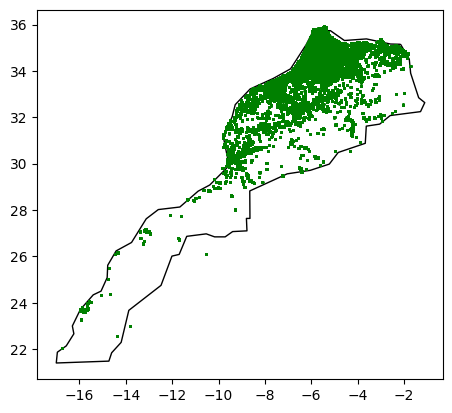

In [303]:
# import matplotlib.pyplot as plt

# # Create a GeoDataFrame from 'non_fire_df'
# gdf_non_fire = gpd.GeoDataFrame(
#     non_fire_df_sample, 
#     geometry=gpd.points_from_xy(non_fire_df_sample.longitude, non_fire_df_sample.latitude)
# )

# # Plot the shape of Morocco
# fig, ax = plt.subplots(1, 1)
# morocco_shape.plot(ax=ax, color='white', edgecolor='black')

# # Plot the locations from 'non_fire_df'
# gdf_non_fire.plot(ax=ax, color='green', markersize=1)

# plt.show()

## Merging Output

In [ ]:
# wildfire_augmented_sample_df  #= wildfire_augmented_df.sample(n=2000000)

In [287]:
# wild_fire_pred_output=wildfire_augmented_sample_df[['acq_date','latitude','longitude','station_name','is_fire']]
# wild_fire_pred_output=pd.concat([wild_fire_pred_output,non_fire_df[['acq_date','latitude','longitude','station_name','is_fire']]]).reset_index(drop=True)

In [14]:
# wild_fire_pred_output.to_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample.parquet')
wild_fire_pred_output=pd.read_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample.parquet')

In [15]:
wild_fire_pred_output_shufled=wild_fire_pred_output.sample(frac=1).reset_index(drop=True)#.to_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample_shuffled.parquet')

In [16]:
wild_fire_pred_output_shufled

,acq_date,latitude,longitude,station_name,is_fire
0,2010-09-10,34.016920,-5.391822,BASSATINE,1
1,2010-01-23,33.618110,-2.352220,GUERCIF,0
2,2020-07-11,35.045491,-6.145411,OULAD EL RHOUMARI,1
3,2017-12-13,35.490719,-5.789125,IBN BATOUTA,1
4,2011-05-11,28.856593,-10.651452,GUELMIN,0
...,...,...,...,...,...
3999995,2020-08-26,35.250500,-5.549941,CHEFCHAOUEN,1
3999996,2014-03-08,32.422820,-8.447107,BEN GUERIR AIR BASE,1
3999997,2022-08-02,32.784956,-5.437294,MIDELT,1
3999998,2017-07-24,34.855163,-6.130596,OULAD EL RHOUMARI,1


## Holiday Dataset

In [17]:
import pandas as pd
from datetime import datetime

# # Define a custom date parser
# date_parser = lambda x: datetime.strptime(x, '%Y %d %b')

# # Read the CSV file
holiday_df = pd.read_csv('Data/Holiday-Hist.txt', sep=';')

In [18]:
# Load the data
holiday_df = pd.read_csv('Data/Holiday-Hist.txt', sep=';')

# Dictionary mapping French month abbreviations to numerical values
month_dict = {
    'jan': '01',
    'fév': '02',
    'mar': '03',
    'avr': '04',
    'mai': '05',
    'juin': '06',
    'juil': '07',
    'aoû': '08',
    'sep': '09',
    'oct': '10',
    'nov': '11',
    'déc': '12'
}

# Replace French month abbreviations with numerical values
holiday_df['Date'] = holiday_df['Date'].replace(month_dict, regex=True)

# Now you can parse the dates
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'], format='%Y %d %m')

In [25]:
holiday_df.groupby('DayOfWeek').count()

,Date,Name,Type
DayOfWeek,,,
dimanche,82,82,82
jeudi,42,42,42
lundi,43,43,43
mardi,43,43,43
mercredi,42,42,42
samedi,45,45,45
vendredi,48,48,48


# Data Deep Meaning Extraction

### Date Meanings

In [19]:
# using holiday_df Date to generate is_holiday for the wild_fire_pred_output_shufled based on its acc_date column

# Convert 'Date' in 'holiday_df' to datetime and extract the date part
holiday_df['Date'] = pd.to_datetime(holiday_df['Date']).dt.date

# Convert 'acq_date' in 'wild_fire_pred_output_shuffled' to datetime and extract the date part
wild_fire_pred_output_shufled['acq_date'] = pd.to_datetime(wild_fire_pred_output_shufled['acq_date']).dt.date

# Generate 'is_holiday' column
wild_fire_pred_output_shufled['is_holiday'] = wild_fire_pred_output_shufled['acq_date'].isin(holiday_df['Date']).astype(int)

# use acc_date column in wild_fire_pred_output_shufled to generate day_of_week and day_of_year and is_weekend columns
# Convert 'acq_date' to datetime
wild_fire_pred_output_shufled['acq_date'] = pd.to_datetime(wild_fire_pred_output_shufled['acq_date'])

# Generate 'day_of_week' column (Monday=0, Sunday=6)
wild_fire_pred_output_shufled['day_of_week'] = wild_fire_pred_output_shufled['acq_date'].dt.dayofweek

# Generate 'day_of_year' column
wild_fire_pred_output_shufled['day_of_year'] = wild_fire_pred_output_shufled['acq_date'].dt.dayofyear

# Generate 'is_weekend' column
wild_fire_pred_output_shufled['is_weekend'] = wild_fire_pred_output_shufled['day_of_week'].isin([5, 6]).astype(int)

In [31]:
wild_fire_pred_output_shufled[wild_fire_pred_output_shufled['day_of_week']==6].is_fire.mean()

0.510783682747477

In [32]:
wild_fire_pred_output_shufled.sort_values(by='acq_date',ascending=False)

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend
493925,2022-12-30,32.641306,-3.143840,BOUARFA,0,0,4,364,0
2634909,2022-12-30,28.354161,-9.683023,GUELMIN,0,0,4,364,0
1180439,2022-12-30,24.107234,-14.431490,SMARA,0,0,4,364,0
163571,2022-12-30,30.462945,-7.679848,IJJOUKAK,0,0,4,364,0
2081613,2022-12-30,26.094887,-13.718568,SMARA,0,0,4,364,0
...,...,...,...,...,...,...,...,...,...
1747401,2010-01-01,22.877748,-14.708879,SMARA,0,1,4,1,0
1621396,2010-01-01,21.816029,-16.534434,SMARA,0,1,4,1,0
376511,2010-01-01,30.777438,-6.718265,OUARZAZATE,0,1,4,1,0
3794312,2010-01-01,30.717822,-9.075150,TAROUDANT,0,1,4,1,0


## NDVI matching

In [44]:
ndvi_df[(ndvi_df.Date.dt.year==2019)&(ndvi_df.Date.dt.month==3)].Date.value_counts()

Date
2019-03-08    9135
2019-03-24    9135
Name: count, dtype: int64

In [47]:
ndvi_df[ndvi_df.Date==pd.to_datetime('2019-03-08 ')]

,Latitude,Longitude,Date,NDVI
2009700,35.875000,-5.458333,2019-03-08,5953
2009701,35.875000,-5.375000,2019-03-08,5540
2009702,35.791667,-5.875000,2019-03-08,7470
2009703,35.791667,-5.791667,2019-03-08,3601
2009704,35.791667,-5.708333,2019-03-08,6351
...,...,...,...,...
2018830,21.375000,-13.208333,2019-03-08,1102
2018831,21.375000,-13.125000,2019-03-08,1128
2018832,21.375000,-13.041667,2019-03-08,1149
2018833,21.208333,-17.041667,2019-03-08,911


In [49]:
ndvi_df[ndvi_df.Date==pd.to_datetime('2019-03-24')]

,Latitude,Longitude,Date,NDVI
2018835,35.875000,-5.458333,2019-03-24,5936
2018836,35.875000,-5.375000,2019-03-24,5924
2018837,35.791667,-5.875000,2019-03-24,6550
2018838,35.791667,-5.791667,2019-03-24,3114
2018839,35.791667,-5.708333,2019-03-24,6179
...,...,...,...,...
2027965,21.375000,-13.208333,2019-03-24,1096
2027966,21.375000,-13.125000,2019-03-24,1107
2027967,21.375000,-13.041667,2019-03-24,1124
2027968,21.208333,-17.041667,2019-03-24,873


In [33]:
ndvi_dforg=ndvi_df.copy()
ndvi_df=ndvi_df.drop(columns=['Satellites','Percentile'])

In [55]:
# from haversine import haversine
# import numpy as np
# def find_nearest_ndvi(row):
#     # Extract the year and month from 'acq_date'
#     year = row['acq_date'].year
#     month = row['acq_date'].month

#     # Filter 'ndvi_df' to only include rows where the year and month match those of 'acq_date'
#     ndvi_df_filtered = ndvi_df[(ndvi_df['Date'].dt.year == year) & (ndvi_df['Date'].dt.month == month)]

#     # If 'ndvi_df_filtered' is empty, find the nearest date with coordinates
#     if ndvi_df_filtered.empty:
#         date_diffs = abs(ndvi_df['Date'] - row['acq_date'])
#         nearest_date_index = date_diffs.idxmin()
#         ndvi_df_filtered = ndvi_df.loc[[nearest_date_index]]

#     coords_firm = row[['latitude', 'longitude']].values
#     coords_ndvi_s = ndvi_df_filtered[['Latitude', 'Longitude']].values
#     distances = [haversine(coords_firm, coord_ndvi) for coord_ndvi in coords_ndvi_s]
#     nearest_ndvi_index = np.argmin(distances)
#     return ndvi_df_filtered.iloc[nearest_ndvi_index]

In [38]:
# import pandas as pd
# from concurrent.futures import ProcessPoolExecutor
# from haversine import haversine
# import numpy as np

# # Assuming ndvi_df and wild_fire_pred_output_shufled are already defined and loaded

# def find_nearest_ndvi(row, ndvi_df):
#     """
#     Find the nearest NDVI data point for a given row of wildfire data.
#     This function is designed to run in parallel.
#     """
#     # Extract latitude, longitude, and acquisition date from the row
#     lat, lon, acq_date = row['latitude'], row['longitude'], row['acq_date']
    
#     # Filter NDVI data for the relevant month and year
#     ndvi_df_filtered = ndvi_df[(ndvi_df['Date'].dt.year == acq_date.year) &
#                                (ndvi_df['Date'].dt.month == acq_date.month)]
    
#     # If no exact match for month and year, find the closest date
#     if ndvi_df_filtered.empty:
#         ndvi_df['temp'] = abs(ndvi_df['Date'] - acq_date)
#         ndvi_df_filtered = ndvi_df.loc[ndvi_df['temp'].idxmin()].to_frame().T
    
#     # Compute distances to all NDVI points in the filtered DataFrame
#     distances = ndvi_df_filtered.apply(lambda x: haversine((lat, lon), (x['Latitude'], x['Longitude'])), axis=1)
    
#     # Find the index of the nearest NDVI point
#     nearest_index = distances.idxmin()
    
#     # Return the matched NDVI data
#     return ndvi_df_filtered.loc[nearest_index]

# def parallel_ndvi_matching(wildfire_df, ndvi_df):
#     """
#     Match NDVI data to wildfire data in parallel.
#     """
#     # Convert 'acq_date' to datetime format if it's not already
#     wildfire_df['acq_date'] = pd.to_datetime(wildfire_df['acq_date'])
    
#     # Prepare rows for parallel processing
#     rows = [row for _, row in wildfire_df.iterrows()]
    
#     # Use ProcessPoolExecutor to parallelize the operation
#     with ProcessPoolExecutor() as executor:
#         # Submit all rows for processing
#         futures = [executor.submit(find_nearest_ndvi, row, ndvi_df) for row in rows]
        
#         # Wait for all futures to complete and collect results
#         results = [f.result() for f in futures]
    
#     # Combine results into a single DataFrame
#     matched_ndvi_df = pd.concat(results, axis=1).T.reset_index(drop=True)
    
#     return matched_ndvi_df

# # Example usage
# # matched_ndvi_df = parallel_ndvi_matching(wild_fire_pred_output_shufled, ndvi_df)


In [34]:
# import pandas as pd
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from haversine import haversine
# import numpy as np

# # Assuming ndvi_df and wild_fire_pred_output_shuffled are already defined and loaded

# def batch_process_ndvi(batch, ndvi_df):
#     """
#     Process a batch of wildfire data rows to find the nearest NDVI points.
#     """
#     results = []
#     for row in batch:
#         lat, lon, acq_date = row['latitude'], row['longitude'], row['acq_date']
#         ndvi_df_filtered = ndvi_df[(ndvi_df['Date'].dt.year == acq_date.year) &
#                                    (ndvi_df['Date'].dt.month == acq_date.month)]
#         if ndvi_df_filtered.empty:
#             ndvi_df['temp'] = abs(ndvi_df['Date'] - acq_date)
#             ndvi_df_filtered = ndvi_df.loc[ndvi_df['temp'].idxmin()].to_frame().T
        
#         distances = ndvi_df_filtered.apply(lambda x: haversine((lat, lon), (x['Latitude'], x['Longitude'])), axis=1)
#         nearest_index = distances.idxmin()
#         results.append(ndvi_df_filtered.loc[nearest_index])
#     return pd.concat(results, axis=1).T.reset_index(drop=True)

# def parallel_ndvi_matching_optimized(wildfire_df, ndvi_df, batch_size=100):
#     """
#     Optimized function to match NDVI data to wildfire data in parallel using batch processing.
#     """
#     wildfire_df['acq_date'] = pd.to_datetime(wildfire_df['acq_date'])
#     batches = [wildfire_df.iloc[i:i+batch_size] for i in range(0, wildfire_df.shape[0], batch_size)]
    
#     with ProcessPoolExecutor() as executor:
#         futures = {executor.submit(batch_process_ndvi, batch, ndvi_df): batch for batch in batches}
#         results = [future.result() for future in as_completed(futures)]
    
#     matched_ndvi_df = pd.concat(results).reset_index(drop=True)
#     return matched_ndvi_df

# # Example usage
# wild_fire_ndvi = parallel_ndvi_matching_optimized(wild_fire_pred_output_shufled, ndvi_df)


In [98]:
ndvi_dates=list(set(ndvi_df.Date))
ndvi_dates.sort()

In [113]:
ndvi_df

,Latitude,Longitude,Date,NDVI
0,35.875000,-5.458333,2010-01-08,4713
1,35.875000,-5.375000,2010-01-08,5958
2,35.791667,-5.875000,2010-01-08,5091
3,35.791667,-5.791667,2010-01-08,3169
4,35.791667,-5.708333,2010-01-08,4895
...,...,...,...,...
2850115,21.375000,-13.208333,2022-12-24,1069
2850116,21.375000,-13.125000,2022-12-24,1089
2850117,21.375000,-13.041667,2022-12-24,1120
2850118,21.208333,-17.041667,2022-12-24,876


In [109]:
wf_shunks=wild_fire_pred_output_shufled.copy()

In [115]:
from haversine import haversine

def find_nearest_ndvi_location(row, ndvi_shunk):
    coords_firm = row[['latitude', 'longitude']].values
    coords_ndvis = ndvi_shunk[['Latitude', 'Longitude']].values
    distances = [haversine(coords_firm, coords_ndvi) for coords_ndvi in coords_ndvis]
    nearest_pos_ndvi_index = np.argmin(distances)
    return ndvi_shunk.iloc[nearest_pos_ndvi_index]

In [117]:
# Initialize an empty DataFrame to store the results
new_wf_ndvi_df = pd.DataFrame()

# Loop over the range of the length of 'ndvi_dates' minus 1
for i in range(len(ndvi_dates)-1):
    # Get the current and previous dates from 'ndvi_dates'
    current_date = ndvi_dates[i+1]
    previous_date = ndvi_dates[i]

    # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
    wf_shunk_i = wf_shunks[(wf_shunks.acq_date >= previous_date) & (wf_shunks.acq_date < current_date)]

    # Filter 'ndvi_df' to only include rows where 'Date' is equal to the previous date
    previous_date_ndvi = ndvi_df[ndvi_df.Date == previous_date]

    # Apply the 'find_nearest_ndvi_location' function to 'wf_shunk_i' and pass 'previous_date_ndvi' as an argument
    wf_shunk_i = wf_shunk_i.apply(find_nearest_ndvi_location, args=(previous_date_ndvi,), axis=1)

    # Concatenate 'new_wf_ndvi_df' and 'wf_shunk_i' and assign the result back to 'new_wf_ndvi_df'
    new_wf_ndvi_df = pd.concat([new_wf_ndvi_df, wf_shunk_i])

    # Print the first 5 rows of 'wf_shunk_i'
    print(wf_shunk_i.head())

       Latitude  Longitude       Date  NDVI
1     33.625000     -2.375 2010-01-08  1413
148   33.708333     -2.125 2010-01-08  1475
212   30.708333     -6.125 2010-01-08  1313
1115  33.208333     -2.625 2010-01-08  1540
1318  32.208333     -4.375 2010-01-08  1971
       Latitude  Longitude       Date  NDVI
69    28.875000 -10.291667 2010-01-24  1363
416   23.625000 -15.875000 2010-01-24 -3000
764   29.041667  -9.625000 2010-01-24  1268
926   26.375000 -12.791667 2010-01-24   955
2252  34.291667  -4.458333 2010-01-24  4153
       Latitude  Longitude       Date  NDVI
78    30.625000  -6.291667 2010-02-08  1315
114   31.625000  -7.625000 2010-02-08  4622
545   22.541667 -14.375000 2010-02-08   854
1154  35.041667  -5.375000 2010-02-08  5226
1817  26.291667 -13.375000 2010-02-08  1017
       Latitude  Longitude       Date  NDVI
702   28.041667 -10.291667 2010-02-22  1187
831   28.875000  -8.875000 2010-02-22   845
2197  34.458333  -4.958333 2010-02-22  4898
2922  31.958333  -3.708333 2010-

In [121]:
new_wf_ndvi_df.to_parquet('Data/FinalDataSet/wild_fire_pred_output_4m_sample_shuffled_ndvi_only.parquet')

In [122]:
new_wf_ndvi_df_bcp=new_wf_ndvi_df.copy()

In [123]:
# Initialize an empty DataFrame to store the results
new_wf_part = pd.DataFrame()

# Loop over the range of the length of 'ndvi_dates' minus 1
for i in range(len(ndvi_dates)-1):
    # Get the current and previous dates from 'ndvi_dates'
    current_date = ndvi_dates[i+1]
    previous_date = ndvi_dates[i]

    # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
    wf_shunk_i = wf_shunks[(wf_shunks.acq_date >= previous_date) & (wf_shunks.acq_date < current_date)]

    # Filter 'ndvi_df' to only include rows where 'Date' is equal to the previous date
    previous_date_ndvi = ndvi_df[ndvi_df.Date == previous_date]


    # Concatenate 'new_wf_ndvi_df' and 'wf_shunk_i' and assign the result back to 'new_wf_ndvi_df'
    new_wf_part = pd.concat([new_wf_part, wf_shunk_i])

    # Print the first 5 rows of 'wf_shunk_i'
    print(wf_shunk_i.head())

       acq_date   latitude  longitude station_name  is_fire  is_holiday  \
1    2010-01-23  33.618110  -2.352220      GUERCIF        0           0   
148  2010-01-18  33.739646  -2.117478       ANGADS        0           0   
212  2010-01-13  30.689624  -6.143511       ZAGORA        0           0   
1115 2010-01-10  33.220497  -2.612931      BOUARFA        0           0   
1318 2010-01-09  32.203961  -4.375877   ERRACHIDIA        1           0   

      day_of_week  day_of_year  is_weekend  
1               5           23           1  
148             0           18           0  
212             2           13           0  
1115            6           10           1  
1318            5            9           1  
       acq_date   latitude  longitude station_name  is_fire  is_holiday  \
69   2010-02-03  28.902894 -10.326309      GUELMIN        0           0   
416  2010-01-27  23.689462 -15.876109        SMARA        0           0   
764  2010-01-30  29.049525  -9.608617      GUELMIN    

In [125]:
new_wf_ndvi_df

,Latitude,Longitude,Date,NDVI
1,33.625000,-2.375000,2010-01-08,1413
148,33.708333,-2.125000,2010-01-08,1475
212,30.708333,-6.125000,2010-01-08,1313
1115,33.208333,-2.625000,2010-01-08,1540
1318,32.208333,-4.375000,2010-01-08,1971
...,...,...,...,...
3998761,26.375000,-14.041667,2022-12-08,1026
3999041,24.791667,-14.458333,2022-12-08,783
3999240,27.458333,-10.458333,2022-12-08,1067
3999337,35.458333,-5.875000,2022-12-08,1227


In [128]:
new_wf_part['NDVI']=new_wf_ndvi_df['NDVI']

In [130]:
# new_wf_part.to_parquet('Data/FinalDataSet/++wild_fire_holidays_ndvi.parquet')

In [5]:
wild_fire_holidays_ndvi=pd.read_parquet('Data/FinalDataSet/++wild_fire_holidays_ndvi.parquet')
wild_fire_holidays_ndvi

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend,NDVI
1,2010-01-23,33.618110,-2.352220,GUERCIF,0,0,5,23,1,1413
148,2010-01-18,33.739646,-2.117478,ANGADS,0,0,0,18,0,1475
212,2010-01-13,30.689624,-6.143511,ZAGORA,0,0,2,13,0,1313
1115,2010-01-10,33.220497,-2.612931,BOUARFA,0,0,6,10,1,1540
1318,2010-01-09,32.203961,-4.375877,ERRACHIDIA,1,0,5,9,1,1971
...,...,...,...,...,...,...,...,...,...,...
3998761,2022-12-21,26.359706,-14.035895,TARFAYA,0,1,2,355,0,1026
3999041,2022-12-09,24.773057,-14.424866,SMARA,0,0,4,343,0,783
3999240,2022-12-23,27.432005,-10.474649,PLAGE BLANCHE,0,0,4,357,0,1067
3999337,2022-12-19,35.468448,-5.911269,IBN BATOUTA,0,0,0,353,0,1227


In [ ]:
# import concurrent.futures

# def process_wf_shunk(wf_shunk_i, previous_date_ndvi):
#     # Apply the 'find_nearest_ndvi_location' function to 'wf_shunk_i' and pass 'previous_date_ndvi' as an argument
#     wf_shunk_i = wf_shunk_i.apply(find_nearest_ndvi_location, args=(previous_date_ndvi,), axis=1)
#     return wf_shunk_i

# def process_wf_shunks(wf_shunks):
#     # Initialize an empty DataFrame to store the results
#     new_wf_ndvi_df = pd.DataFrame()

#     # Create a process pool executor with 48 processes
#     with concurrent.futures.ProcessPoolExecutor(max_workers=48) as executor:
#         # Loop over the range of the length of 'ndvi_dates' minus 1
#         for i in range(len(ndvi_dates)-1):
#             # Get the current and previous dates from 'ndvi_dates'
#             current_date = ndvi_dates[i+1]
#             previous_date = ndvi_dates[i]

#             # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
#             wf_shunk_i = wf_shunks[(wf_shunks.acq_date >= previous_date) & (wf_shunks.acq_date < current_date)]

#             # Filter 'ndvi_df' to only include rows where 'Date' is equal to the previous date
#             previous_date_ndvi = ndvi_df[ndvi_df.Date == previous_date]

#             # Submit the 'process_wf_shunk' function to the executor
#             future = executor.submit(process_wf_shunk, wf_shunk_i, previous_date_ndvi)

#             # Concatenate 'new_wf_ndvi_df' and the result of the 'process_wf_shunk' function and assign the result back to 'new_wf_ndvi_df'
#             new_wf_ndvi_df = pd.concat([new_wf_ndvi_df, future.result()])

#     # Return the new DataFrame
#     return new_wf_ndvi_df

## Soil Moisture Data Integration

In [4]:
from haversine import haversine, Unit
import pandas as pd
soil_moisture_df=pd.read_parquet('Data/FinalDataSet/morocco_soil_moisture.parquet').drop(columns=['geometry'])
wild_fire_holidays_ndvi=pd.read_parquet('Data/FinalDataSet/++wild_fire_holidays_ndvi.parquet')
wild_fire_holidays_ndvi

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend,NDVI
1,2010-01-23,33.618110,-2.352220,GUERCIF,0,0,5,23,1,1413
148,2010-01-18,33.739646,-2.117478,ANGADS,0,0,0,18,0,1475
212,2010-01-13,30.689624,-6.143511,ZAGORA,0,0,2,13,0,1313
1115,2010-01-10,33.220497,-2.612931,BOUARFA,0,0,6,10,1,1540
1318,2010-01-09,32.203961,-4.375877,ERRACHIDIA,1,0,5,9,1,1971
...,...,...,...,...,...,...,...,...,...,...
3998761,2022-12-21,26.359706,-14.035895,TARFAYA,0,1,2,355,0,1026
3999041,2022-12-09,24.773057,-14.424866,SMARA,0,0,4,343,0,783
3999240,2022-12-23,27.432005,-10.474649,PLAGE BLANCHE,0,0,4,357,0,1067
3999337,2022-12-19,35.468448,-5.911269,IBN BATOUTA,0,0,0,353,0,1227


In [53]:
def find_nearest_soil_moisture_location(row, soil_moisture_shunk):
    coords_firm = row[['latitude', 'longitude']].values
    coords_soil_moisture = soil_moisture_shunk[['Latitude', 'Longitude']].values
    distances = [haversine(coords_firm, coords_soil) for coords_soil in coords_soil_moisture]
    nearest_pos_soil_moisture_index = np.argmin(distances)
    return soil_moisture_shunk.iloc[nearest_pos_soil_moisture_index]

In [5]:
wild_fire_holidays_ndvi_bcp=wild_fire_holidays_ndvi.copy()
wild_fire_holidays_ndvi=wild_fire_holidays_ndvi_bcp.sample(1000)
wild_fire_holidays_ndvi

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend,NDVI
691262,2015-10-26,33.053282,-7.531241,SETTAT,1,0,0,299,0,2330
679977,2011-08-22,33.874047,-6.478373,SALE,0,0,0,234,0,2517
803895,2012-07-09,30.841734,-3.918041,MOULAY ALI CHERIF,0,0,0,191,0,1145
3008796,2016-03-09,33.537142,-7.636964,ANFA,1,0,2,69,0,2892
2481292,2020-08-23,32.988165,-7.148516,KHOURIBGA,1,0,6,236,1,1830
...,...,...,...,...,...,...,...,...,...,...
980514,2021-10-09,34.941193,-5.180483,CHEFCHAOUEN,1,0,5,282,1,4125
3654726,2013-07-08,35.774014,-5.744260,TANGER-PORT,1,0,0,189,0,4176
2605914,2021-09-30,29.769100,-9.155643,TIZNIT,1,0,3,273,0,2400
1801322,2019-09-04,24.326176,-14.380031,SMARA,0,0,2,247,0,802


In [6]:
# Add 15 days group column to soil_moisture_df  
# (expample if date is 2012-07-09 then 15_days_group is 2012-07-14 
# and if date is 2012-07-14 then 15_days_group is 2012-07-28
# and is date is 2012-07-28 then 15_days_group is 2012-08-14 and so on)
# Convert 'date' column to datetime format
soil_moisture_df['Date'] = pd.to_datetime(soil_moisture_df['Date'])

# Function to calculate the 15_days_group for each date
def calculate_15_days_group(date):
    # Calculate the number of days since the start of the month
    days_from_start = date.day
    
    # Calculate the next group date by adding the necessary days
    if days_from_start <= 15:
        group_date = date.replace(day=15)
    else:
        # Add 15 days to the current date
        group_date = pd.Timestamp(date.year, date.month, 1) + pd.DateOffset(days=14)
        
        # Handle month and year transition
        if date.day > 15:
            group_date = group_date + pd.DateOffset(days=15)
    
    return group_date

def calculate_3_days_group(date):
    # Determine the group start by finding the remainder when subtracting 1 and dividing by 3
    days_from_start = date.day
    group_start_day = ((days_from_start - 1) // 3) * 3 + 1

    # Check if the day is at the end of the month and handle leap year for February
    is_end_of_month = (date.month == 2 and group_start_day > 28 and not calendar.isleap(date.year)) or \
                      (date.month == 2 and group_start_day > 29 and calendar.isleap(date.year)) or \
                      (date.month in [4, 6, 9, 11] and group_start_day > 30) or \
                      (group_start_day > 31)

    if is_end_of_month:
        # If it's the end of the month, adjust to the last valid group start of the month
        if date.month == 2:
            group_start_day = 29 if calendar.isleap(date.year) else 28
        elif date.month in [4, 6, 9, 11]:
            group_start_day = 30
        else:
            group_start_day = 31

    # Create the group date
    group_date = date.replace(day=group_start_day)

    # Adjust for the next group if necessary, ensuring it does not exceed the month's days
    next_group_day = group_start_day + 3
    try:
        group_date = group_date.replace(day=next_group_day)
    except ValueError:
        # If next group day exceeds the month, adjust the month and possibly year
        if date.month == 12:
            # Transition to next year
            group_date = pd.Timestamp(date.year + 1, 1, 1)
        else:
            # Transition to next month
            group_date = pd.Timestamp(date.year, date.month + 1, 1)

    return group_date

# Function for 6-day grouping similar to the 3-day grouping function
def calculate_6_days_group(date):
    # Determine the group start by finding the remainder when subtracting 1 and dividing by 6
    days_from_start = date.day
    group_start_day = ((days_from_start - 1) // 6) * 6 + 1

    # Check if the day is at the end of the month and handle leap year for February
    is_end_of_month = (date.month == 2 and group_start_day > 28 and not calendar.isleap(date.year)) or \
                      (date.month == 2 and group_start_day > 29 and calendar.isleap(date.year)) or \
                      (date.month in [4, 6, 9, 11] and group_start_day > 30) or \
                      (group_start_day > 31)

    if is_end_of_month:
        # If it's the end of the month, adjust to the last valid group start of the month
        if date.month == 2:
            group_start_day = 29 if calendar.isleap(date.year) else 28
        elif date.month in [4, 6, 9, 11]:
            group_start_day = 30
        else:
            group_start_day = 31

    # Create the group date
    group_date = date.replace(day=group_start_day)

    # Adjust for the next group if necessary, ensuring it does not exceed the month's days
    next_group_day = group_start_day + 6
    try:
        group_date = group_date.replace(day=next_group_day)
    except ValueError:
        # If next group day exceeds the month, adjust the month and possibly year
        if date.month == 12:
            # Transition to next year
            group_date = pd.Timestamp(date.year + 1, 1, 1)
        else:
            # Transition to next month
            group_date = pd.Timestamp(date.year, date.month + 1, 1)

    return group_date

# Apply the 6-day grouping function to a sample date
sample_date_6_day_group = pd.to_datetime("2023-02-28")  # End of February in a non-leap year
calculate_6_days_group(sample_date_6_day_group)


# Apply the function to the 'date' column and create the new '15_days_group' column
soil_moisture_df['15_days_group'] = soil_moisture_df['Date'].apply(calculate_15_days_group)
# soil_moisture_df['three_days_group'] = soil_moisture_df['Date'].apply(calculate_3_days_group)
# soil_moisture_df['six_days_group'] = soil_moisture_df['Date'].apply(calculate_6_days_group)
soil_moisture_df

,Date,Latitude,Longitude,SoilMoisture,OpticalDepth,SoilMoistureError,15_days_group
0,2012-07-04,35.875,-5.375,47.0,0.19,0.03,2012-07-15
1,2012-07-04,35.625,-5.875,34.0,0.26,0.03,2012-07-15
2,2012-07-04,35.625,-5.625,36.0,0.33,0.03,2012-07-15
3,2012-07-04,35.625,-5.375,43.0,0.29,0.04,2012-07-15
4,2012-07-04,35.375,-5.875,27.0,0.34,0.03,2012-07-15
...,...,...,...,...,...,...,...
2842343,2024-03-20,21.375,-14.125,5.0,0.00,0.02,2024-03-30
2842344,2024-03-20,21.375,-13.875,4.0,0.00,0.02,2024-03-30
2842345,2024-03-20,21.375,-13.625,2.0,0.00,0.00,2024-03-30
2842346,2024-03-20,21.375,-13.375,1.0,-0.01,0.00,2024-03-30


In [21]:
import pandas as pd
import numpy as np

# Ensure 'Date' is of datetime type
soil_moisture_df['Date'] = pd.to_datetime(soil_moisture_df['Date'])

# Generate a list of all dates that need to be covered
date_range = pd.date_range(start=soil_moisture_df['Date'].min(), end=soil_moisture_df['Date'].max())

# Initialize an empty DataFrame to hold the complete dataset
complete_df = pd.DataFrame()

# Iterate over each unique combination of Latitude and Longitude
for (lat, lon), group in soil_moisture_df.groupby(['Latitude', 'Longitude']):
    # Create a temporary DataFrame covering the entire date range for this location
    temp_df = pd.DataFrame({'Date': date_range, 'Latitude': lat, 'Longitude': lon})
    
    # Merge the temporary DataFrame with the existing data
    # This ensures all dates are included, filling missing values with NaN
    merged_df = pd.merge(temp_df, group, on=['Date', 'Latitude', 'Longitude'], how='left')
    
    # Append to the complete dataset
    complete_df = pd.concat([complete_df, merged_df], ignore_index=True)

# Now 'complete_df' includes an entry for every date for each coordinate, with NaNs where data is missing


In [26]:
complete_df

,Date,Latitude,Longitude,SoilMoisture,OpticalDepth,SoilMoistureError,15_days_group
0,2012-07-04,21.375,-16.875,NaN,NaN,NaN,NaT
1,2012-07-05,21.375,-16.875,16.0,0.03,0.01,2012-07-15
2,2012-07-06,21.375,-16.875,NaN,NaN,NaN,NaT
3,2012-07-07,21.375,-16.875,18.0,0.04,0.00,2012-07-15
4,2012-07-08,21.375,-16.875,18.0,0.05,0.00,2012-07-15
...,...,...,...,...,...,...,...
4149655,2024-03-16,35.875,-5.375,NaN,NaN,NaN,NaT
4149656,2024-03-17,35.875,-5.375,NaN,NaN,NaN,NaT
4149657,2024-03-18,35.875,-5.375,NaN,NaN,NaN,NaT
4149658,2024-03-19,35.875,-5.375,NaN,NaN,NaN,NaT


In [37]:
def interpolate_group(group):
    # Ensure 'Date' is the index for interpolation
    group = group.set_index('Date')
    # Interpolate missing values
    group['SoilMoisture'] = group['SoilMoisture'].interpolate(method='time')
    # Reset index to return to original format
    return group.reset_index()

# Apply interpolation to each group
complete_df = complete_df.groupby(['Latitude', 'Longitude']).apply(interpolate_group).reset_index(drop=True)


In [46]:
import pandas as pd

# Assuming `complete_df` is your original DataFrame and is sorted by Date, Latitude, and Longitude
# First, create a copy of your DataFrame that's shifted up by one row
shifted_df = complete_df.shift(-1)

# Add a suffix to distinguish columns in the shifted DataFrame
shifted_df = shifted_df.add_suffix('_next_day')

# Combine the original DataFrame with the shifted DataFrame
merged_df = pd.concat([complete_df, shifted_df], axis=1)

# Now, define a function that will be applied row-wise
def fill_missing_soil_moisture(row):
    # Check if SoilMoisture is NaN and if the next row is the next day for the same location
    if pd.isna(row['SoilMoisture']) and row['Date'] + pd.Timedelta(days=1) == row['Date_next_day'] and row['Latitude'] == row['Latitude_next_day'] and row['Longitude'] == row['Longitude_next_day']:
        return row['SoilMoisture_next_day']
    else:
        return row['SoilMoisture']

# Apply this function to fill missing SoilMoisture values
complete_df['SoilMoisture'] = merged_df.apply(fill_missing_soil_moisture, axis=1)

# At this point, `complete_df` has its missing `SoilMoisture` values filled where possible


In [49]:
complete_df.to_parquet('Data/FinalDataSet/complete_morocco_soil_moisture_interpolated.parquet')

In [30]:
complete_df.drop(columns=['OpticalDepth','SoilMoistureError','15_days_group'],inplace=True)

In [25]:
for day in complete_df.Date:
    print(f"{day} : {complete_df[complete_df.Date==day].shape}")

2012-07-04 00:00:00 : (970, 7)
2012-07-05 00:00:00 : (970, 7)
2012-07-06 00:00:00 : (970, 7)
2012-07-07 00:00:00 : (970, 7)
2012-07-08 00:00:00 : (970, 7)
2012-07-09 00:00:00 : (970, 7)
2012-07-10 00:00:00 : (970, 7)
2012-07-11 00:00:00 : (970, 7)
2012-07-12 00:00:00 : (970, 7)
2012-07-13 00:00:00 : (970, 7)
2012-07-14 00:00:00 : (970, 7)
2012-07-15 00:00:00 : (970, 7)
2012-07-16 00:00:00 : (970, 7)
2012-07-17 00:00:00 : (970, 7)
2012-07-18 00:00:00 : (970, 7)
2012-07-19 00:00:00 : (970, 7)
2012-07-20 00:00:00 : (970, 7)
2012-07-21 00:00:00 : (970, 7)
2012-07-22 00:00:00 : (970, 7)
2012-07-23 00:00:00 : (970, 7)
2012-07-24 00:00:00 : (970, 7)
2012-07-25 00:00:00 : (970, 7)
2012-07-26 00:00:00 : (970, 7)
2012-07-27 00:00:00 : (970, 7)
2012-07-28 00:00:00 : (970, 7)
2012-07-29 00:00:00 : (970, 7)
2012-07-30 00:00:00 : (970, 7)
2012-07-31 00:00:00 : (970, 7)
2012-08-01 00:00:00 : (970, 7)
2012-08-02 00:00:00 : (970, 7)
2012-08-03 00:00:00 : (970, 7)
2012-08-04 00:00:00 : (970, 7)
2012-08-

KeyboardInterrupt: 

In [50]:
soil_moisture_date_list=list(set(complete_df.Date))
soil_moisture_date_list.sort()
soil_moisture_date_list
import pandas as pd

# Convert the list to a Series
soil_moisture_dates = pd.Series(pd.to_datetime(soil_moisture_date_list))

# Create a date range from the minimum to the maximum date in the list
date_range = pd.date_range(start=soil_moisture_dates.min(), end=soil_moisture_dates.max())

# Find the dates that are in the range but not in the list
missing_dates = date_range.difference(soil_moisture_dates)

print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [51]:
from tqdm import tqdm
import pandas as pd
import numpy as np

wf_h_ndvi_moisture = pd.DataFrame()

for i in tqdm(range(len(soil_moisture_date_list) - 1)):
    current_date = pd.to_datetime(soil_moisture_date_list[i+1])  # Convert to datetime
    previous_date = pd.to_datetime(soil_moisture_date_list[i])  # Convert to datetime

    # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
    wf_shunk_i = wild_fire_holidays_ndvi[(wild_fire_holidays_ndvi.acq_date == current_date)]
    if wf_shunk_i.empty:
        continue

    # Filter 'soil_moisture_df' to only include rows where 'Date' is equal to the previous date
    previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['Day'] == previous_date]
    # if previous_date_soil_moisture.empty:
    #     previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == previous_date]
    # if previous_date_soil_moisture.empty:
    #     previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == pd.to_datetime(soil_moisture_date_list[i-1])]
            
    


    # Apply the 'find_nearest_soil_moisture_location' function to 'wf_shunk_i' and pass 'previous_date_soil_moisture' as an argument
    moisture_shunk_i = wf_shunk_i.apply(find_nearest_soil_moisture_location, args=(previous_date_soil_moisture,), axis=1)
    
    wf_shunk_i['SoilMoisture'] = moisture_shunk_i['SoilMoisture']

    # Concatenate 'wf_h_ndvi_moisture' and 'wf_shunk_i' and assign the result back to 'wf_h_ndvi_moisture'
    wf_h_ndvi_moisture = pd.concat([wf_h_ndvi_moisture, wf_shunk_i])

    # Print the first 5 rows of 'wf_shunk_i'
    # print(wf_shunk_i.head())

  0%|          | 0/4277 [00:00<?, ?it/s]


ValueError: attempt to get argmin of an empty sequence

In [19]:
soil_moisture_date_list=list(set(soil_moisture_df['15_days_group']))
soil_moisture_date_list.sort()
# soil_moisture_date_list

In [16]:
wild_fire_holidays_ndvi=wild_fire_holidays_ndvi_bcp
wild_fire_holidays_ndvi

,acq_date,latitude,longitude,station_name,is_fire,is_holiday,day_of_week,day_of_year,is_weekend,NDVI
1,2010-01-23,33.618110,-2.352220,GUERCIF,0,0,5,23,1,1413
148,2010-01-18,33.739646,-2.117478,ANGADS,0,0,0,18,0,1475
212,2010-01-13,30.689624,-6.143511,ZAGORA,0,0,2,13,0,1313
1115,2010-01-10,33.220497,-2.612931,BOUARFA,0,0,6,10,1,1540
1318,2010-01-09,32.203961,-4.375877,ERRACHIDIA,1,0,5,9,1,1971
...,...,...,...,...,...,...,...,...,...,...
3998761,2022-12-21,26.359706,-14.035895,TARFAYA,0,1,2,355,0,1026
3999041,2022-12-09,24.773057,-14.424866,SMARA,0,0,4,343,0,783
3999240,2022-12-23,27.432005,-10.474649,PLAGE BLANCHE,0,0,4,357,0,1067
3999337,2022-12-19,35.468448,-5.911269,IBN BATOUTA,0,0,0,353,0,1227


In [17]:
from tqdm import tqdm
import pandas as pd
import numpy as np

wf_h_ndvi_moisture = pd.DataFrame()

for i in tqdm(range(len(soil_moisture_date_list) - 1)):
    current_date = pd.to_datetime(soil_moisture_date_list[i+1])  # Convert to datetime
    previous_date = pd.to_datetime(soil_moisture_date_list[i])  # Convert to datetime

    # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
    wf_shunk_i = wild_fire_holidays_ndvi[(wild_fire_holidays_ndvi.acq_date >= previous_date) & (wild_fire_holidays_ndvi.acq_date < current_date)]
    if wf_shunk_i.empty:
        continue

    # Filter 'soil_moisture_df' to only include rows where 'Date' is equal to the previous date
    previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == current_date]
    if previous_date_soil_moisture.empty:
        previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == previous_date]
    if previous_date_soil_moisture.empty:
        previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == pd.to_datetime(soil_moisture_date_list[i-1])]
            
    


    # Apply the 'find_nearest_soil_moisture_location' function to 'wf_shunk_i' and pass 'previous_date_soil_moisture' as an argument
    moisture_shunk_i = wf_shunk_i.apply(find_nearest_soil_moisture_location, args=(previous_date_soil_moisture,), axis=1)
    
    wf_shunk_i['SoilMoisture'] = moisture_shunk_i['SoilMoisture']

    # Concatenate 'wf_h_ndvi_moisture' and 'wf_shunk_i' and assign the result back to 'wf_h_ndvi_moisture'
    wf_h_ndvi_moisture = pd.concat([wf_h_ndvi_moisture, wf_shunk_i])

    # Print the first 5 rows of 'wf_shunk_i'
    # print(wf_shunk_i.head())

  0%|          | 0/281 [00:00<?, ?it/s]C:\Users\ayoub\AppData\Local\Temp\ipykernel_47120\3026388040.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf_shunk_i['SoilMoisture'] = moisture_shunk_i['SoilMoisture']
  0%|          | 1/281 [1:06:37<310:55:04, 3997.52s/it]


KeyboardInterrupt: 

In [52]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Assuming the presence of a Haversine function compatible with cdist
def haversine(lonlat1, lonlat2):
    """
    Haversine distance between two points, given as (lon, lat).
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lonlat1[0], lonlat1[1], lonlat2[0], lonlat2[1]])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Vectorizing the Haversine function for use with scipy's cdist
def vectorized_haversine(points1, points2):
    return cdist(points1, points2, metric=haversine)

wf_h_ndvi_moisture = pd.DataFrame()

# Preprocessing
coords_soil_moisture = soil_moisture_df[['Longitude', 'Latitude']].to_numpy()

for i in tqdm(range(len(soil_moisture_date_list) - 1)):
    current_date = pd.to_datetime(soil_moisture_date_list[i+1])
    previous_date = pd.to_datetime(soil_moisture_date_list[i])

    wf_shunk_i = wild_fire_holidays_ndvi[(wild_fire_holidays_ndvi.acq_date >= previous_date) & (wild_fire_holidays_ndvi.acq_date < current_date)]
    if wf_shunk_i.empty:
        continue

    previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == current_date]
    if previous_date_soil_moisture.empty:
        previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == previous_date]
    if previous_date_soil_moisture.empty and i > 0:  # Ensuring i-1 doesn't result in an index error
        previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == pd.to_datetime(soil_moisture_date_list[i-1])]

    if previous_date_soil_moisture.empty:
        continue

    # Coordinates for this chunk
    coords_wf_shunk_i = wf_shunk_i[['longitude', 'latitude']].to_numpy()

    # Filter soil moisture data to only those relevant for the current chunk
    relevant_soil_moisture = previous_date_soil_moisture[['Longitude', 'Latitude']].to_numpy()

    # Calculate distances between fire locations and soil moisture measurements
    distances = vectorized_haversine(coords_wf_shunk_i, relevant_soil_moisture)

    # Find index of the nearest soil moisture location for each fire location
    nearest_indices = np.argmin(distances, axis=1)

    # Extract the matching soil moisture data
    matched_soil_moisture = previous_date_soil_moisture.iloc[nearest_indices]

    # Assign the matched soil moisture data back to the wildfire DataFrame
    wf_shunk_i['SoilMoisture'] = matched_soil_moisture['SoilMoisture'].values

    # Concatenate this chunk back into the main DataFrame
    wf_h_ndvi_moisture = pd.concat([wf_h_ndvi_moisture, wf_shunk_i])

# Optionally, print the first few rows to verify
print(wf_h_ndvi_moisture.head())


C:\Users\ayoub\AppData\Local\Temp\ipykernel_47120\3102687833.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf_shunk_i['SoilMoisture'] = matched_soil_moisture['SoilMoisture'].values
 55%|█████▌    | 2370/4277 [8:31:29<6:26:28, 12.16s/it]C:\Users\ayoub\AppData\Local\Temp\ipykernel_47120\3102687833.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wf_shunk_i['SoilMoisture'] = matched_soil_moisture['SoilMoisture'].values
 55%|█████▌    | 2371/4277 [8:32:35<10:32:05, 19.90s/it]C:\Users\ayoub\AppData\Lo

        acq_date   latitude  longitude station_name  is_fire  is_holiday  \
572   2012-07-14  33.245001  -3.028299      GUERCIF        0           0   
8907  2012-07-14  34.598013  -2.346202       ANGADS        1           0   
19593 2012-07-14  33.923162  -5.233643        SAISS        0           0   
20648 2012-07-14  34.595529  -2.345756       ANGADS        1           0   
21246 2012-07-14  31.410135  -8.240100       MENARA        0           0   

       day_of_week  day_of_year  is_weekend  NDVI  SoilMoisture  
572              5          196           1  1314           7.0  
8907             5          196           1  1698          13.0  
19593            5          196           1  2962           6.0  
20648            5          196           1  1698          13.0  
21246            5          196           1  1081           9.0  


In [ ]:
wf_m_sample1=wf_h_ndvi_moisture.copy()

In [ ]:
# import concurrent.futures
# import pandas as pd

# def process_wf_shunk(i, soil_moisture_date_list, wild_fire_holidays_ndvi, soil_moisture_df):
#     current_date = pd.to_datetime(soil_moisture_date_list[i+1])  # Convert to datetime
#     previous_date = pd.to_datetime(soil_moisture_date_list[i])  # Convert to datetime

#     # Filter 'wf_shunks' to only include rows where 'acq_date' is between the previous and current dates
#     wf_shunk_i = wild_fire_holidays_ndvi[(wild_fire_holidays_ndvi.acq_date >= previous_date) & (wild_fire_holidays_ndvi.acq_date < current_date)]
#     if wf_shunk_i.empty:
#         return pd.DataFrame()

#     # Filter 'soil_moisture_df' to only include rows where 'Date' is equal to the previous date
#     previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == current_date]
#     if previous_date_soil_moisture.empty:
#         previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == previous_date]
#     if previous_date_soil_moisture.empty:
#         previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == pd.to_datetime(soil_moisture_date_list[i-1])]

#     # Apply the 'find_nearest_soil_moisture_location' function to 'wf_shunk_i' and pass 'previous_date_soil_moisture' as an argument
#     moisture_shunk_i = wf_shunk_i.apply(find_nearest_soil_moisture_location, args=(previous_date_soil_moisture,), axis=1)
    
#     wf_shunk_i['SoilMoisture'] = moisture_shunk_i['SoilMoisture']

#     return wf_shunk_i

# wf_h_ndvi_moisture=pd.DataFrame()

# # Create a process pool executor with 48 processes
# with concurrent.futures.ProcessPoolExecutor(max_workers=48) as executor:
#     # Submit the 'process_wf_shunk' function to the executor for each index in 'soil_moisture_date_list'
#     futures = [executor.submit(process_wf_shunk, i, soil_moisture_date_list, wild_fire_holidays_ndvi, soil_moisture_df) for i in range(len(soil_moisture_date_list)-1)]

#     for future in concurrent.futures.as_completed(futures):
#         # Concatenate 'wf_h_ndvi_moisture' and the result of the 'process_wf_shunk' function and assign the result back to 'wf_h_ndvi_moisture'
#         wf_h_ndvi_moisture = pd.concat([wf_h_ndvi_moisture, future.result()])

#         # Print the first 5 rows of the result
#         print(future.result().head())

In [17]:
# from multiprocessing import Pool, cpu_count
# import pandas as pd

# # Define the function that will be applied in parallel
# def process_chunk(i):
#     current_date = pd.to_datetime(soil_moisture_date_list[i + 1])
#     previous_date = pd.to_datetime(soil_moisture_date_list[i])
    
#     wf_shunk_i = wild_fire_holidays_ndvi[(wild_fire_holidays_ndvi.acq_date >= previous_date) & (wild_fire_holidays_ndvi.acq_date < current_date)]
#     if wf_shunk_i.empty:
#         return pd.DataFrame()  # Return an empty DataFrame for consistency
    
#     previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == current_date]
#     if previous_date_soil_moisture.empty:
#         previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == previous_date]
#     if previous_date_soil_moisture.empty:
#         previous_date_soil_moisture = soil_moisture_df[soil_moisture_df['15_days_group'] == pd.to_datetime(soil_moisture_date_list[i - 1])]
    
#     moisture_shunk_i = wf_shunk_i.apply(find_nearest_soil_moisture_location, args=(previous_date_soil_moisture,), axis=1)
#     wf_shunk_i['SoilMoisture'] = moisture_shunk_i['SoilMoisture']
    
#     return wf_shunk_i

# # Create a pool of workers
# pool = Pool(processes=cpu_count())

# # Map the function across the data
# results = pool.map(process_chunk, range(len(soil_moisture_date_list) - 1))

# # Close the pool and wait for work to complete
# pool.close()
# pool.join()

# # Concatenate the results, filtering out any empty DataFrames
# wf_h_ndvi_moisture = pd.concat([r for r in results if not r.empty], ignore_index=True)

# # Display the first few rows of the concatenated DataFrame
# wf_h_ndvi_moisture.head()
